In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Project 6-Segmenting customers into clusters-Dataset.xlsx to Project 6-Segmenting customers into clusters-Dataset.xlsx


In [31]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Project 6-Segmenting customers into clusters-Dataset.xlsx']))

In [32]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA

In [33]:
data.shape

(541909, 8)

In [34]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [35]:
data['CustomerID'] = data['CustomerID'].astype('category')

In [36]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [37]:
import seaborn as sns

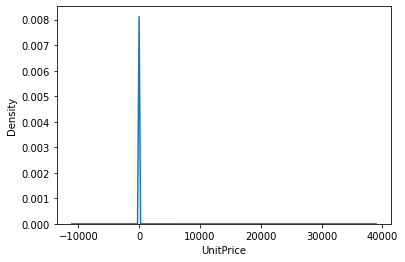

In [38]:
sns.kdeplot(data['UnitPrice'])

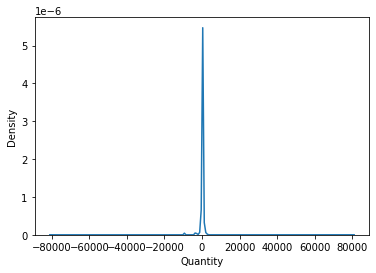

In [39]:
sns.kdeplot(data['Quantity'])

Quantity and Unit price cannot be negetive and also from the graph it can be observed that there are outliers present in the data.

In [40]:
def to_normal(val,dat):
  for i in val:
    quant25 = dat[i].quantile(0.25)
    quant75 = dat[i].quantile(0.75)
    IQR = quant75-quant25
    max_val = quant75 + 1.5*IQR
    dat = dat.loc[(dat[i]>0) & (dat[i]<max_val)]
  return dat  

The function to_normal returns the data without outliers.

In [41]:
var = ['UnitPrice','Quantity']
data_1 = to_normal(var,data)

In [42]:
def cleaned(val,dat):
  plt.figure(figsize=(10,3),dpi=150)
  for i,j in enumerate(val):
    plt.subplot(1,len(val),i+1)
    sns.kdeplot(dat[j])

The function cleaned returnes the data without outliers.

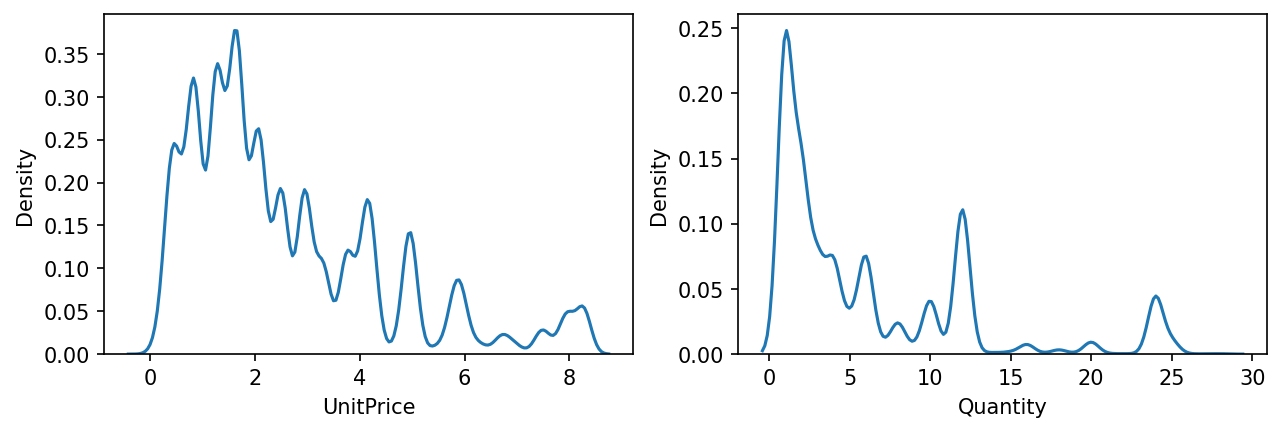

In [43]:
cleaned(var,data_1)

In [44]:
data_1.describe()

,Quantity,UnitPrice
count,465535.000000,465535.000000
mean,6.154218,2.593720
std,6.404671,1.926692
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,3.750000
max,28.000000,8.330000


In [45]:
data = data_1

In [46]:
import datetime as dt
data['Year'] = data['InvoiceDate'].dt.year.astype('category')
data['Month'] = data['InvoiceDate'].dt.month.astype('category')
data['Day'] = data['InvoiceDate'].dt.day.astype('category')
data['Hour'] = data['InvoiceDate'].dt.hour.astype('category')

In [47]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8


In [48]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     115694
Country             0
Year                0
Month               0
Day                 0
Hour                0
dtype: int64

In [49]:
data['CustomerID'].isna().sum()/data.shape[0]

0.24851837133620458

Almost 25% datapoints of the feature CustomerID is missing and it is replaced with the mode of the feature.

In [50]:

data['CustomerID'].fillna(data['CustomerID'].mode()[0],inplace=True)

In [51]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Day            0
Hour           0
dtype: int64

In [52]:
def encoding(val):
    for i in val:   
        mapping = {}
        cat = list(data[i].unique())
        for j,l in enumerate(cat):
            mapping.update({l:j+1})
        data[i] = data[i].map(mapping)    
        data[i] = data[i].astype('int64')

The function encoding assigns numerical values to the categorical features present in the data.

In [53]:
var = ['InvoiceNo','StockCode','Description','CustomerID','Country']

In [54]:
encoding(var)

In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,1,1,1,6,2010-12-01 08:26:00,2.55,1,1,2010,12,1,8
1,1,2,2,6,2010-12-01 08:26:00,3.39,1,1,2010,12,1,8
2,1,3,3,8,2010-12-01 08:26:00,2.75,1,1,2010,12,1,8
3,1,4,4,6,2010-12-01 08:26:00,3.39,1,1,2010,12,1,8
4,1,5,5,6,2010-12-01 08:26:00,3.39,1,1,2010,12,1,8


In [56]:
data = data.drop(['InvoiceDate'],axis=1)

# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [58]:
data_sc = scalar.fit_transform(data)

data_sc is the scaled data.

In [59]:
data_sc = pd.DataFrame(data_sc,columns=data.columns)
data_sc.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,-1.744048,-1.134597,-1.145926,-0.024079,-0.022692,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213
1,-1.744048,-1.133706,-1.145050,-0.024079,0.413289,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213
2,-1.744048,-1.132815,-1.144174,0.288193,0.081113,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213
3,-1.744048,-1.131924,-1.143298,-0.024079,0.413289,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213
4,-1.744048,-1.131034,-1.142422,-0.024079,0.413289,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213


# Clustering

In [60]:
from sklearn.cluster import KMeans

In [61]:
inertia = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_sc)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve for Clustering')

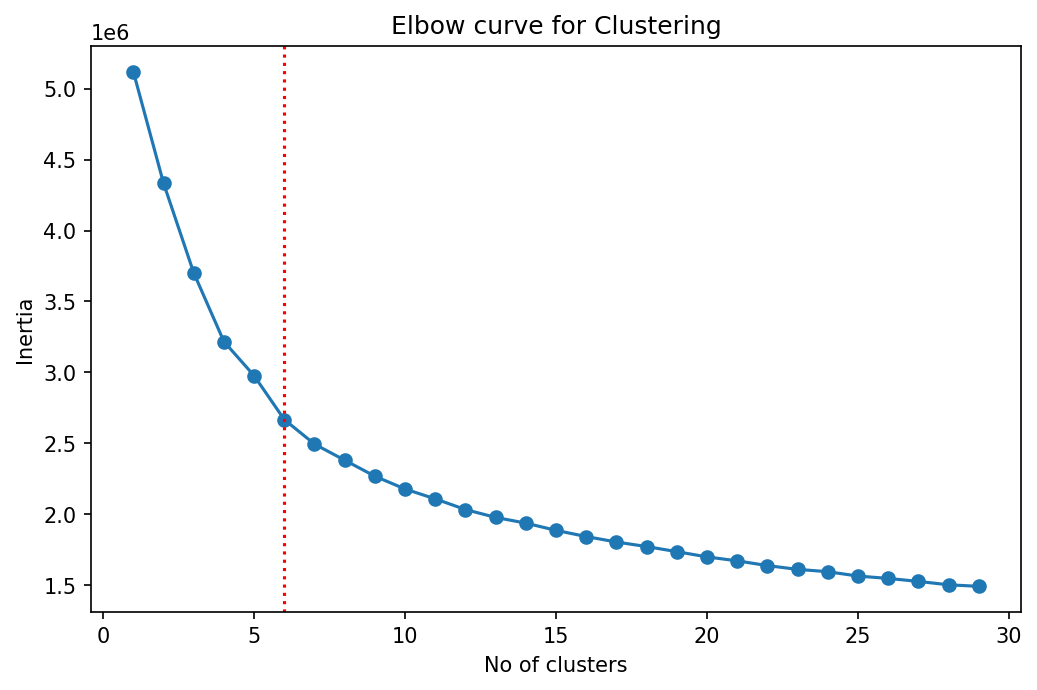

In [87]:
plt.figure(figsize=(8,5),dpi=150)
plt.plot(range(1,30),inertia, marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.axvline(x=6,linestyle=':',color='r')
plt.title('Elbow curve for Clustering')

From the elbow curve it can be observed that after cluster number 6 inertia of the remaining clusters is almost constant and hence the number of clusters present in the data can be choosen as 6.

In [75]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_sc)
pred = kmeans.predict(data_sc)

In [76]:
pred

array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

In [77]:
data_sc['Cluster'] = pred

In [78]:
data_sc.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Cluster
0,-1.744048,-1.134597,-1.145926,-0.024079,-0.022692,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213,5
1,-1.744048,-1.133706,-1.145050,-0.024079,0.413289,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213,5
2,-1.744048,-1.132815,-1.144174,0.288193,0.081113,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213,5
3,-1.744048,-1.131924,-1.143298,-0.024079,0.413289,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213,5
4,-1.744048,-1.131034,-1.142422,-0.024079,0.413289,-0.92575,-0.198932,-3.486586,1.262453,-1.618275,-2.110213,5


In [81]:
data_sc['Cluster'].value_counts()

2    136025
1    127905
3    100097
0     57976
5     35184
4      8348
Name: Cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of clusters')

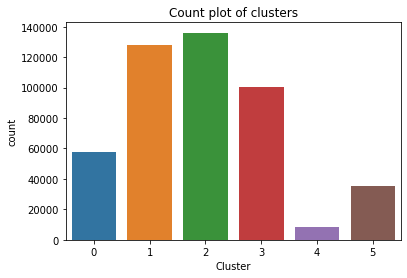

In [85]:
sns.countplot(data_sc['Cluster'])
plt.title('Count plot of clusters')

The above plot describe the number of datapoints present in each of the clusters.